# Week 1: Introduction to Causal Inference and Machine Learning

**Author:** Minjae Yun

**References:**
- "Machine Learning Methods That Economists Should Know About" by Athey and Imbens (2019)
- "An Introduction to Statistical Learning with Applications in Python." New York: Springer, 2023
- "Causal Inference in Python: Applying Causal Inference in the Tech Industry." 1st Edition. O'Reilly Media, 2023
- "Reinforcement Learning: An Introduction." Second Edition. MIT Press, Cambridge, MA, 2018
- Notes by A. Colin Cameron [link](https://cameron.econ.ucdavis.edu/e240f/machlearn2019_Riverside_2.pdf)
- Notes by Matteo Courthoud [link](https://matteocourthoud.github.io/course/ml-econ/)



## Motivation

**Difference-in-Differences (Diff-in-Diffs):** A Canonical Causal Identification Technique

Difference-in-Differences (Diff-in-Diffs) stands as a foundational causal identification technique, underpinned by the requirement of the "Parallel Trends" assumption. It hinges on a conceptual framework that navigates the realms of counterfactual worlds. <br>

**Recap of Diff-in-Diffs Equation:**
$Y= β_0 + β_1*[Time] + β_2*[Intervention] + β_3*[Time*Intervention] + β_4*[Covariates]+ε$

Graphical representation:


![Diff-in-Diffs Graph](https://www.publichealth.columbia.edu/sites/default/files/styles/cola_media_400/public/media/images/2023-03/didgraph.png?itok=c-3WaCpu)
Source: [Columbia Public Health](https://www.publichealth.columbia.edu/research/population-health-methods/difference-difference-estimation#:~:text=Parallel%20Trend%20Assumption&text=It%20requires%20that%20in%20the,observations%20over%20many%20time%20points)

Next, the natural question arises: Why not predict the potential outcome, especially given our assumption of the control group, which effectively entails replacing the unobserved group with the observed one? This notion underscores the significance of synthetic control as a canonical imputing method in Economics. Additionally, it's worth noting that another pivotal reason highlighting how Machine Learning can enhance causal inference will be explored further below.

**Why Machine Learning in Causal Inference?**

The realm of empirical research and causal inference inherently involves the imputation of potential outcomes. In this domain, Machine Learning techniques have already exhibited their prowess in extracting valuable insights from data to predict outcomes within stable environments.

<img src="https://github.com/MinjaeYun/2023fall/blob/main/images/table1.png?raw=true" alt="drawing" width="600"/>

Source: Notes by A. Colin Cameron

However, Machine Learning comes with its own challenges, most notably the specter of overfitting. To mitigate this issue, regularization techniques, tuning parameters, and cross-validation play pivotal roles.


## A. Supervised Learning

Supervised learning deals with observations containing both covariates and outcomes (commonly represented as $y_i$), whereas unsupervised learning is conducted on observations without associated outcomes.

### A-1. Summary

**1. Regularizers for Parametric Predictive Models**

Consider the Data Generating Process:
<p style="text-align: center;"> $ y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \ldots + \beta_n x_n + \epsilon $ </p>
 Regularization introduces constraints to optimize data extraction, akin to economic optimization with constraints. This constraint is termed a [norm](https://en.wikipedia.org/wiki/Norm_(mathematics)). The methods include:

- Subset selection: $ ||\beta||_0 := \sum 1(\beta) $
- Ridge: $ ||\beta||_1 := \sum \beta_j^2 $
- Lasso: $ ||\beta||_2 := \sum |\beta_j| $
- Elastic Nets: $ \alpha||\beta||_1 + (1-\alpha)||\beta||_2$
Generalized Equation: argmin $\sum (Y-\beta X)^2 + \lambda ||\beta|| $,
where $\beta$ is the set of optimizers and $\lambda$ is obtained through out-of-sample cross-validation.
(Note: Subscriptions near each norm are tentative.)

**2. Nonparametric Predictive Models and Regularizers**

No specific data generating process optimizing "out-of-sample predictive power."

- Decision/regression trees: Tuning parameters include depth, number of nodes/leaves, minimal leaf size, information gain at splits.
- Nearest neighbors: Number of neighbors.
- Kernel regression: Kernel bandwidth.

**3. Deep Learning and Regularizers**

Prediction of latent variables used in the data generating process.

- Neural networks: Tuning parameters include number of levels, number of neurons per level, connectivity between neurons.

**4. Ensemble Methods and Regularizers**

Weighted average of combined methods, originating from tree methods and now applied to other methods.

- Random forest (linear combination of trees): Tuning parameters include number of trees, number of variables used in each tree, size of bootstrap sample, complexity of trees.
- Athey and Imbens (2019) recommend combining widely different methods (e.g., Random forest + neural net + lasso).
- Equation: $argmin_p \sum (Y-p^{rf}\hat{Y}^{RF} -p^{nn}\hat{Y}^{NN}-p^{lasso}\hat{Y}^{LASSO} )^2 $,
where $ p^{rf}$, $p^{nn}$, and $p^{lasso}$ are the weights and optimizers.
- Athey et al. (2019) found that the combination of synthetic control and matrix completion outperforms individual models.

[Python Practice](https://matteocourthoud.github.io/course/ml-econ/05_regularization/)

### A-2. Bias-Variance Trade-Off

The Mean Squared Error (MSE) is a commonly used measure to evaluate model fit:

<p style="text-align: center;">  $MSE = \frac{1}{n} \sum (y-f(x))^2$ </p>

The expected test MSE at $x_0$ decomposes into three components (testing estimated function through numerous out-of-sample training sets):

<p style="text-align: center;"> $E(y_0-\hat{f}(x_0))^2 = Var(\hat{f}(x_0)) + [Bias(\hat{f}(x_0))]^2 + Var(\epsilon) $, </p>

Where $Var()$ and $Bias()$ refer to the variance and bias of $f$, the functional form of the model.
- The trade-off between bias and variance naturally arises at a fixed MSE due to its inherent equation.
- Generally, more flexible methods result in less bias and more variance.
- Note that $\sum (y-f(x))^2$ is the sum of squared errors, an alternative measure of model fit.

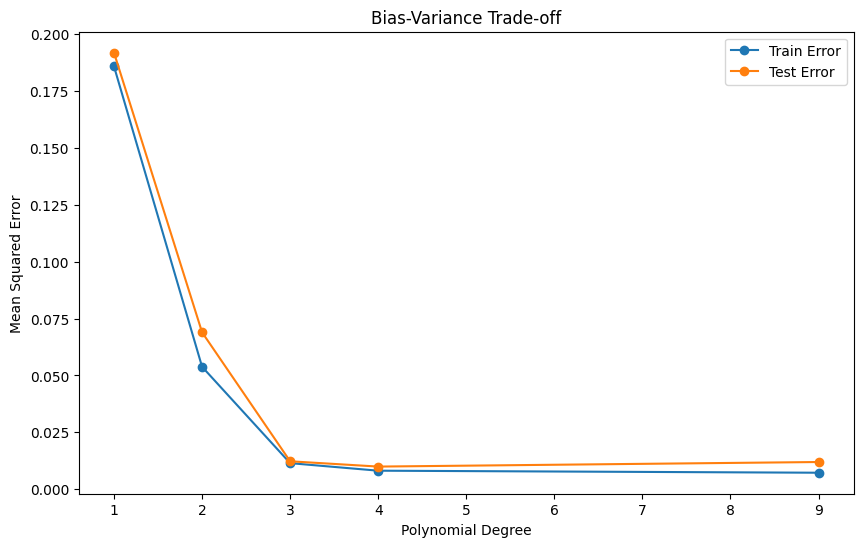

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Generate some synthetic data
np.random.seed(0)
X = np.sort(5 * np.random.rand(80, 1), axis=0)
y = np.sin(X).ravel() + np.random.normal(0, 0.1, X.shape[0])

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

# Train polynomial regression models of different degrees
degrees = [1, 2, 3, 4, 9]
train_errors = []
test_errors = []

for degree in degrees:
    # Transform features to higher degrees
    polynomial_features = PolynomialFeatures(degree=degree)
    X_train_poly = polynomial_features.fit_transform(X_train)
    
    # Train linear regression model
    model = LinearRegression()
    model.fit(X_train_poly, y_train)
    
    # Calculate training error
    y_train_pred = model.predict(X_train_poly)
    train_error = mean_squared_error(y_train, y_train_pred)
    train_errors.append(train_error)
    
    # Calculate testing error
    X_test_poly = polynomial_features.transform(X_test)
    y_test_pred = model.predict(X_test_poly)
    test_error = mean_squared_error(y_test, y_test_pred)
    test_errors.append(test_error)

# Plot bias-variance trade-off
plt.figure(figsize=(10, 6))
plt.plot(degrees, train_errors, label='Train Error', marker='o')
plt.plot(degrees, test_errors, label='Test Error', marker='o')
plt.xlabel('Polynomial Degree')
plt.ylabel('Mean Squared Error')
plt.title('Bias-Variance Trade-off')
plt.legend()
plt.show()


### A-3. Exploring Decision Tree Methods

Decision tree methods involve iteratively splitting the dataset into subsamples and using the average outcome (or occasionally the median) as the estimated value to assess model fit. The sum of squared errors in-sample before a split can be represented as:

<p style="text-align: center;"> $Q = \sum (Y - \bar{Y})^2$ </p>
    

Subsequently, splitting with a covariate ($k$) and a threshold ($c$) leads to:

<p style="text-align: center;"> $ Q(k,c) = \sum_{k \leqslant c} (Y-\bar{Y}_{left})^2 + \sum_{k > c} (Y-\bar{Y}_{right})^2  $  </p>

Here, the left term represents the sum of squared errors in the left group ($k ≤ c$), and the right term represents the sum of squared errors in the right group ($k > c$).

- The final tree structure is determined by minimizing $Q(k,c)$. In general, the objective is to minimize:

$$ \sum_{j=1}^{J} \sum_{i \in R_{j}}\left(y_{i}-\bar{y}_{R{j}}\right)^{2} $$


- A single tree offers high interpretability. For instance, optimal prediction of performance levels occurs by segmenting people based on experiences, skills, and personal social networks using specific cutoffs (derived through optimization).

### A-4. Delving into Random Forest

- An issue with decision trees relates to subsampling accuracy.
- Stably establishing cutoffs requires continuous values but real-world situations might involve discontinuity.
- Random forest, a weighted average of multiple trees, helps mitigate this discontinuity (smoothing by weights).
- Random forest predictions can be expressed as 

<p style="text-align: center;"> $\hat{\mu}_{rf}(x) = \sum \alpha_i(x) Y_i$, </p>
where $α_i(x)$ is the weight given by the forest to the i-th training example when predicting at x.

Analogous to obtaining each subsample (leaf) defining the set of nearest neighbors for a target observation. The estimator from a single regression tree is a matching estimator with non-standard methods for selecting nearest neighbors for a target point.

![Random Forest](https://github.com/MinjaeYun/2023fall/blob/main/images/athey%20and%20imbense%20fig%201.png?raw=true)

Source: Notes by A. Colin Cameron 

#### Side Note on Kernel Regression

Kernel Regression:
- Involves a weighting procedure.
- Known as Kernel Smoothing, a non-parametric regression technique using kernel functions to estimate relationships between variables.
- Similarity with random forest: obtaining weights.
- Difference: forest weights are less sensitive to irrelevant and sparse covariates.
- Challenge of traditional random forest: boundary bias problem – no subsample centered around covariate boundaries.
- Solution: local linear forests, seeking arguments ($μ̂(x)$ and $θ̂(x)$) minimizing:

<p style="text-align: center;">  $\sum \alpha_i(x) [Y_i - \mu(x) - (X_i - x) \theta(x)]^2 + \lambda ||\theta(x)||_2^2  $ </p>
- $θ(x)$ represents additional weights emphasizing covariate values near boundaries.
- These methods can be employed for classifications, qualitatively evaluating splits.

[Python Practice](https://matteocourthoud.github.io/course/ml-econ/07_trees/)



### A-5. Unveiling Deep Learning and Neural Networks

- Another highly versatile and flexible approach to estimating regression methods involves predicting latent or unobserved variables.
- This method demands a significant amount of "tuning" compared to random forests.
- Consider $A_{ik}$ as the set of latent variables, derived through linear combinations of observed variables: 
  $A_{ik} = \sum w_{kj}X_{ij} $
  
- Subsequently, apply a non-linear transformation (e.g., a sigmoid function $f(.)$), and model the outcome as a linear function (fully parametric) of this non-linear transformation:

<p style="text-align: center;"> $Y_i = \sum \beta_{k}f[A_{ik}] + e_i$ </p>

![Neural Network](https://github.com/MinjaeYun/2023fall/blob/main/images/figure%20neural.png?raw=true)

Source: Chapter 10 from ISLP

- A second layer can be obtained through $A_{ik}^{(2)} = ∑ w_{kj}^{(2)}f[A_{ij}]$, and the outcome is modeled as:

<p style="text-align: center;"> $Y_i = \sum \beta_{k}^{(2)}f[A_{ik}^{(2)}] + \epsilon_i$ </p>

- Minimizing the sum of squared errors can be complex due to difficulties in obtaining derivatives. However, algorithms have been developed to tackle these challenges.


[Python Practice](https://matteocourthoud.github.io/course/ml-econ/08_neuralnets/)



### A-5. Exploring Additional Topics

There are several other topics worth exploring that contribute to the diverse landscape of machine learning and causal inference:

- **Support Vector Machines and Kernels:** For classification and regression tasks, often used for solving complex decision boundary problems.
- **K-Means Clustering (Unsupervised Learning):** Partitioning data into clusters based on similarities and is widely used for unsupervised grouping of data.
- **Generative Adversarial Network (Unsupervised Learning):** Leveraging two neural networks, a generator and a discriminator, to generate data and distinguish it from real data, respectively.
- **Principal Component Analysis (Unsupervised Learning):** Understanding how to reduce the dimensionality of high-dimensional variables is crucial, even for text and image analysis, where mapping to lower dimensions can reveal underlying patterns.

**Influence/Score Functions:**

- **Qualitative Sensitivity Measures:** Influence and score functions provide insight into how variables contribute to model behavior and prediction. They help assess the extent to which a variable impacts the model's performance

These topics further enrich the toolkit available for conducting causal inference and machine learning analysis.

Feel free to delve into these topics to expand your understanding of the breadth and depth of machine learning and its applications in causal inference.

## B. Causal Inference and Unconfoundedness

### B-1. Uncovering Average Treatment Effects

- **Causal Assumption for Estimates:** Causal estimates rely on the assumption that potential outcomes are independent of treatment assignment, given covariates:

<p style="text-align: center;"> $W_i \perp [Y_i(0),Y_i(1)]|X_i$ </p>


- Returning to the Average Treatment Effect (ATE) equation:



<p style="text-align: center;"> $\tau = E[\mu(1,X_i) - \mu(0,X_i)]$ </p>

- This equation can be further expressed as:

<p style="text-align: center;"> $\tau= \frac{Y_iW_i}{e(X_i)} - \frac{Y_i(1-W_i)}{1-e(X_i)}$ </p>
<p style="text-align: center;"> =$\frac{[Y_i - \mu(1,X_i)]W_i}{e(X_i)} - \frac{[Y_i - \mu(0,X_i)](1-W_i)}{1-e(X_i)} + E[\mu(1,X_i)-\mu(0,X_i)]$   </p>  where

- Where:
  - $\mu(w, x) = E[Y_i | W_i = w, X_i = x]$
  - $e(x) = E[W_i | X_i = x]$

- The objective is to precisely estimate $\mu(.)$ and $e(.)$ to derive the correct ATE.
- These parameters are often referred to as "nuisance parameters" since their values aren't the main focus, but they are necessary for calculating the ATE.

### B-2. Orthogonalization and Cross-Fitting

- The influence function of an efficient semiparametric estimator, denoted as $\psi(y, w, x)$:


<p style="text-align: center;"> $ = \mu(1,x)-\mu(0,x) + \frac{w}{e(x)}[y-\mu(1,x)] + \frac{1-w}{1-e(x)}[y-\mu(0,x)]$   </p>  (Re-ordering the equation above)

- Estimates of $\mu(.)$ and $e(.)$ can be plugged into $\psi(y, w, x)$ to compute $\hat{\Psi}_i = \hat{\psi}(Y_i,W_i,X_i)$.
- The sample average of $\hat{\Psi}_i$ serves as an estimator for the ATE.
- These estimators are orthogonal to the outcomes, as they are computed without using outcome data for estimating $\mu(w, X_i)$ and $e(X_i)$.

- Heterogeneous treatment effects introduce three main challenges: 
  - Learning a low-dimensional representation of treatment effect heterogeneity and hypothesis testing about this heterogeneity.
  - Learning a flexible (nonparametric) estimate of $\tau(x)$.
  - Estimating an optimal policy for allocating units to treatment or control based on covariates $x$.

## C. A/B Testing Versus Multi-Armed Bandits

- The aim is to minimize the waste of assigning units to treatment arms that are already known to be inferior with high confidence.
- Instead of following a predetermined static design, the focus is on sequentially estimating the probability of each treatment being optimal.

> <em> Consider the following learning problem. You are faced repeatedly with a choice among $k$ different options, or actions. After each choice you receive a numerical reward chosen from a stationary probability distribution that depends on the action you selected. Your objective is to maximize the expected total reward over some time period, for example, over 1000 action selections, or time steps. This is the original form of the $k$-armed bandit problem, so named by analogy to a slot machine, or "one-armed bandit," except that it has $k$ levers instead of one. Each action selection is like a play of one of the slot machine's levers, and the rewards are the payoffs for hitting the jackpot. Through repeated action selections you are to maximize your winnings by concentrating your actions on the best levers. Another analogy is that of a doctor choosing between experimental treatments for a series of seriously ill patients. Each action is the selection of a treatment, and each reward is the survival or well-being of the patient. Today the term "bandit problem" is sometimes used for a generalization of the problem described above, but in this book we use it to refer just to this simple case.</em> 

Source: Sutton and Barto (2018)

## D. Matrix Completion and Recommender Systems

Consider observations with outcomes $Y$ and binary treatment $W$ 
<p style="text-align: center;"> $Y=\left[\begin{array}{c*5}
Y_{11} & Y_{12} & ... & Y_{1T}\\
Y_{21} & Y_{22} & ... & Y_{2T}\\
... \\
Y_{N1} & Y_{N2} & ... & Y_{NT}
\end{array}\right] \ \ W = \left[\begin{array}{c*5}
1 & 0 & ... & 1\\
0 & 1 & ... & 1\\
... \\
1 & 0 & ... & 0
\end{array}\right]$ </p>

Converting to potential outcomes context:

<p style="text-align: center;"> $Y(0)=\left[\begin{array}{c*5}
? & ? & ... & Y_{1T}\\
Y_{21} & Y_{22} & ... & ?\\
... \\
Y_{N1} & ? & ... & ?
\end{array}\right]$ (potential control outcome) </p>

<p style="text-align: center;"> $Y(1)=\left[\begin{array}{c*5}
Y_{11} & ? & ... & ?\\
Y_{21} & ? & ... & ?\\
... \\
? & Y_{N2} & ... & Y_{NT}
\end{array}\right]$ (potential treated outcome) </p>

- The objective is to fill in the missing values ("?") in the matrix.
- Let L be the matrix of expected values, and Y be the observed data matrix. Assume:
<p style="text-align: center;">   $Y_it = \begin{cases}
      L_{it} + e_{it} &  \text{if } W_{it}=1\\
      0 & \text{otherwise}
    \end{cases}  $ </p>
    
- Estimating L involves minimizing:

<p style="text-align: center;"> $\text{min}_L\left[\begin{array}\sum(Y_{it} - L_{it})^2 + \lambda ||L||_* \end{array}\right]  $ </p>

- This technique exploits stable patterns over time and between units.